In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../../../datasets/Health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

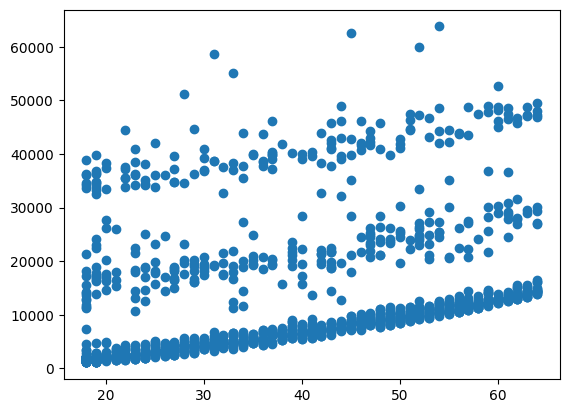

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['age'],df['charges'])

In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df['sex_enc'] = df['sex'].map({'male':0,'female':1})

In [9]:
df['region_enc'] = df['region'].map({'southeast':0,'southwest':1,'northwest':2, 'northeast':3})

In [10]:
df['smoker_enc'] = df['smoker'].apply(lambda x: 1 if x =='yes' else 0 ) #for yes=>1 no=>0

In [11]:
df.corr(numeric_only=True)['charges']

age           0.299008
bmi           0.198341
children      0.067998
charges       1.000000
sex_enc      -0.057292
region_enc   -0.039473
smoker_enc    0.787251
Name: charges, dtype: float64

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

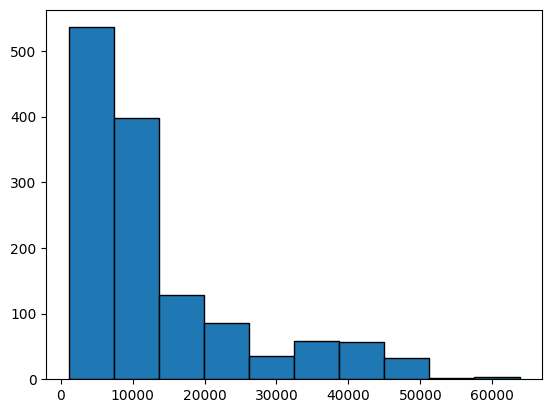

In [12]:
plt.hist(df['charges'], edgecolor='black')

In [13]:
sum(df['charges'] > 52000)

6

In [14]:
df = df[df['charges'] <= 52000].reset_index(drop=True)

In [15]:
df.shape

(1332, 10)

: 

: 

: 

: 

In [16]:
X = df[['age', 'bmi', 'children', 'smoker_enc', 'sex_enc','region_enc']]
y = df['charges']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=32)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Create a model and Train on X,y
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train) #Model Training

LinearRegression()

In [21]:
model.score(X_train_scaled,y_train), model.score(X_test_scaled,y_test) 

(0.7411999848773239, 0.7837966433639213)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [23]:
model.score(X_train_scaled,y_train), model.score(X_test_scaled,y_test) 

(0.8418477412512761, 0.8219938943287491)

In [24]:
from sklearn.svm import SVR
model_lin = SVR(kernel='poly')
model_lin.fit(X_train_scaled,y_train)

SVR(kernel='poly')

In [25]:
model.score(X_train_scaled,y_train), model.score(X_test_scaled,y_test) 

(0.8418477412512761, 0.8219938943287491)

In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [27]:
model.score(X_train_scaled,y_train), model.score(X_test_scaled,y_test) 

(0.9994382968547894, 0.6750076534861766)

In [28]:
params = {'max_depth':[1,2,3,4,5],
         'min_samples_leaf':[2,3,4,5]}

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=10), param_grid=params, cv=5, verbose=1,n_jobs=-1)
grid_cv.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=10), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5]},
             verbose=1)

In [30]:
grid_cv.best_score_

np.float64(0.8609858567620161)

In [31]:
grid_cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 4}

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20, max_depth=5,min_samples_leaf=5, random_state=5)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=20,
                      random_state=5)

In [33]:
model.score(X_train_scaled,y_train), model.score(X_test_scaled,y_test) 

(0.8764611971175551, 0.8926433662399723)

In [34]:
import pickle

In [35]:
pickle.dump(model,open('model_HIPAP.pkl','wb'))

In [36]:
load_model=pickle.load(open('model_HIPAP.pkl','rb'))

In [37]:
load_model.predict([[19,27.900,0,1,1,1],[28,33.000,3,0,0,0],[50,30.970,3,0,0,2]])

array([48035.59744507, 18601.82556141, 17129.77566833])

In [ ]:
X

,age,bmi,children,smoker_enc,sex_enc,region_enc
0,19,27.900,0,1,1,1
1,18,33.770,1,0,0,0
2,28,33.000,3,0,0,0
3,33,22.705,0,0,0,2
4,32,28.880,0,0,0,2
...,...,...,...,...,...,...
1327,50,30.970,3,0,0,2
1328,18,31.920,0,0,1,3
1329,18,36.850,0,0,1,0
1330,21,25.800,0,0,1,1


: 

: 

: 

: 

In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1327    10600.54830
1328     2205.98080
1329     1629.83350
1330     2007.94500
1331    29141.36030
Name: charges, Length: 1332, dtype: float64

: 

: 

: 

: 

: 

: 

: 

: 